## Network
---

#### Import files

In [21]:
%run -i '../scripts/tw_net_collection.py'

In [2]:
%run -i '../scripts/tw_net_cleaning.py'

In [3]:
%run -i '../scripts/tw_net_analysis.py'

In [4]:
%run -i '../scripts/tw_net_extraction.py'

In [295]:
%run -i '../scripts/tw_net_networking.py'

In [5]:
df = file_io.ReadCSV('erie_tweets_c1')

filename: ../data/models/erie_tweets_c1.csv


In [6]:
df = df.sort_values(by=['influence_score'],ascending=False)

In [7]:
df.head()

,id_str,text,created_hr,created_dotw,calltime,day,set,call,favorite_count,retweet_count,...,profile_background_color,profile_text_color,user_screen_name,statuses_count,verified,num_tags,num_media,num_symbols,num_urls,num_user_mentions
5351,1096922040559386626,Your @MarshaMarsh Starters of the Game:\n\nSel...,18,Sat,2019-02-16 19:00:31.011348,16,6,1,0,0,...,A50909,EDC40C,ErieOtters,30832,True,0,0,0,0,1
6077,1097248979346165760,That'll do it for the First Period. We trail ...,16,Sun,2019-02-17 16:42:43.865082,17,5,1,0,0,...,A50909,EDC40C,ErieOtters,30867,True,0,0,0,0,0
5978,1097247218724192257,Evan Bouchard scores and its 4-0 London.\n\n5:...,16,Sun,2019-02-17 16:42:43.865082,17,5,1,0,0,...,A50909,EDC40C,ErieOtters,30865,True,0,0,0,0,0
6065,1097248723242020865,Gerard Keane is called for Holding and we will...,16,Sun,2019-02-17 16:42:43.865082,17,5,1,0,0,...,A50909,EDC40C,ErieOtters,30866,True,0,0,0,0,1
6239,1097282580183961600,"Otters Find Scoring Too Late, Fall 8-5 to Lond...",18,Sun,2019-02-17 18:53:59.653048,17,6,1,0,0,...,A50909,EDC40C,ErieOtters,30894,True,0,1,0,1,0


In [8]:
df.columns

Index(['id_str', 'text', 'created_hr', 'created_dotw', 'calltime', 'day',
       'set', 'call', 'favorite_count', 'retweet_count', 'place_names',
       'place_ids', 'sources', 'influence_score', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'lang', 'is_quote_status', 'retweeted',
       'truncated', 'user_id_str', 'user_name', 'user_description',
       'user_location', 'user_since', 'favorites_counts', 'followers_count',
       'friends_count', 'listed_count', 'profile_background_color',
       'profile_text_color', 'user_screen_name', 'statuses_count', 'verified',
       'num_tags', 'num_media', 'num_symbols', 'num_urls',
       'num_user_mentions'],
      dtype='object')

In [9]:
df.describe()

,id_str,created_hr,day,set,call,favorite_count,retweet_count,influence_score,in_reply_to_status_id_str,in_reply_to_user_id_str,...,favorites_counts,followers_count,friends_count,listed_count,statuses_count,num_tags,num_media,num_symbols,num_urls,num_user_mentions
count,3.740000e+02,374.000000,374.000000,374.000000,374.0,374.0,374.0,374.000000,1.260000e+02,1.410000e+02,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.000000
mean,1.096048e+18,13.347594,13.799465,3.802139,1.0,0.0,0.0,40.289439,1.094941e+18,2.212839e+17,...,25881.462567,1534.965241,997.449198,25.537433,32909.109626,0.117647,0.061497,0.0,0.267380,0.708556
std,7.067968e+14,3.660825,1.929008,1.649891,0.0,0.0,0.0,130.937042,1.179755e+16,3.910561e+17,...,42347.821997,5118.385974,1782.395086,59.663960,45808.306468,0.453829,0.240562,0.0,0.443185,1.195650
min,1.094937e+18,7.000000,11.000000,1.000000,1.0,0.0,0.0,0.025000,9.638183e+17,2.461030e+05,...,0.000000,1.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.095436e+18,9.000000,12.000000,2.000000,1.0,0.0,0.0,7.375000,1.095400e+18,2.329013e+08,...,637.000000,290.000000,302.000000,1.000000,4130.750000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.096060e+18,14.000000,14.000000,4.000000,1.0,0.0,0.0,12.700000,1.095816e+18,6.299049e+08,...,8553.000000,449.500000,475.000000,8.500000,18307.500000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.096559e+18,16.000000,15.000000,5.000000,1.0,0.0,0.0,28.543750,1.096556e+18,4.870859e+09,...,30044.000000,1049.750000,1137.250000,19.000000,40388.750000,0.000000,0.000000,0.0,1.000000,1.000000
max,1.097283e+18,19.000000,17.000000,6.000000,1.0,0.0,0.0,1101.525000,1.097279e+18,1.085592e+18,...,188071.000000,42993.000000,20274.000000,695.000000,216048.000000,4.000000,1.000000,0.0,1.000000,8.000000


/Users/jessedecker/miniconda3/envs/gis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


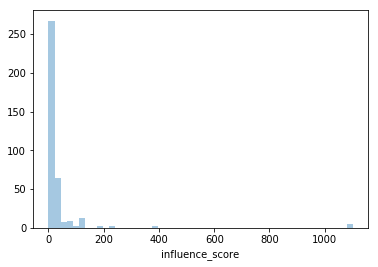

In [10]:
ax = sns.distplot(df['influence_score'],kde=False)

In [11]:
outliers = df['influence_score'].mean()+ df['influence_score'].std()*3.5

df = df[df['influence_score'] < outliers]

# df = df[df['influence_score'] >= 12.675]

In [12]:
users = list(df['user_id_str'].unique())
# len(users)

In [321]:
users[:25]

[65641854,
 201136410,
 318061556,
 807413918586933248,
 176519163,
 1872134220,
 146879662,
 2409232175,
 3293178390,
 347321459,
 15648708,
 590526622,
 351097318,
 1512551,
 259872649,
 1615762506,
 394394376,
 499688053,
 533732403,
 217320158,
 424550559,
 2201577775,
 357131991,
 1692876294,
 900761430]

In [323]:
user = '900761430'
# GetUser(user)
# GetFollowers(user)
# GetFriends(user)

In [67]:
'''
Query user, follower, and friend info. Save to files.
Hitting limit on users with many followers. Run individually.
'''
user = '347321459'
# GetUser(user)
# GetFollowers(user)
# GetFriends(user)

In [324]:
'''
Use subsets of most active users to build graph.
'''
active_users = users[:25]

# G.clear()
G = LoadGraph(active_users)

Graph Density
--------------------------------------------
Number of Nodes :	 176
Number of Edges :	 298
Graph Density :	 	 0.009675324675324675


Score Comparison
DC 	 BC 	 CC 	 Score 	 Name  	 	 
--------------------------------------------
0.15 	 0.07 	 0.24 	 238.07   ETNreisenweber
0.00 	 0.00 	 0.00 	 193.68   lindapezzino
0.00 	 0.00 	 0.00 	 122.70   MissMelissaST
0.14 	 0.02 	 0.19 	 115.25   PrepVilla
0.09 	 0.02 	 0.16 	 106.68   HurstMensHockey
0.15 	 0.01 	 0.08 	 95.90   BenFrankBrian
0.03 	 0.01 	 0.09 	 75.50   jasonwooddd
0.00 	 0.00 	 0.00 	 70.80   JamesIsaak2
0.00 	 0.00 	 0.00 	 70.53   PEPHockey
0.01 	 0.00 	 0.00 	 68.25   bbrannan
0.03 	 0.00 	 0.02 	 51.95   kennyrob24
0.01 	 0.00 	 0.01 	 49.80   iacas
0.08 	 0.04 	 0.14 	 49.45   grant_kru
0.17 	 0.10 	 0.15 	 42.40   LexiiRivera
0.13 	 0.03 	 0.13 	 41.62   queen_mathis32
0.13 	 0.03 	 0.10 	 38.43   DiandreJr
0.09 	 0.00 	 0.08 	 37.23   ErieBetterBeer
0.05 	 0.00 	 0.02 	 35.08   Shackelford1055
0.06 	 0.0

/Users/jessedecker/miniconda3/envs/gis/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


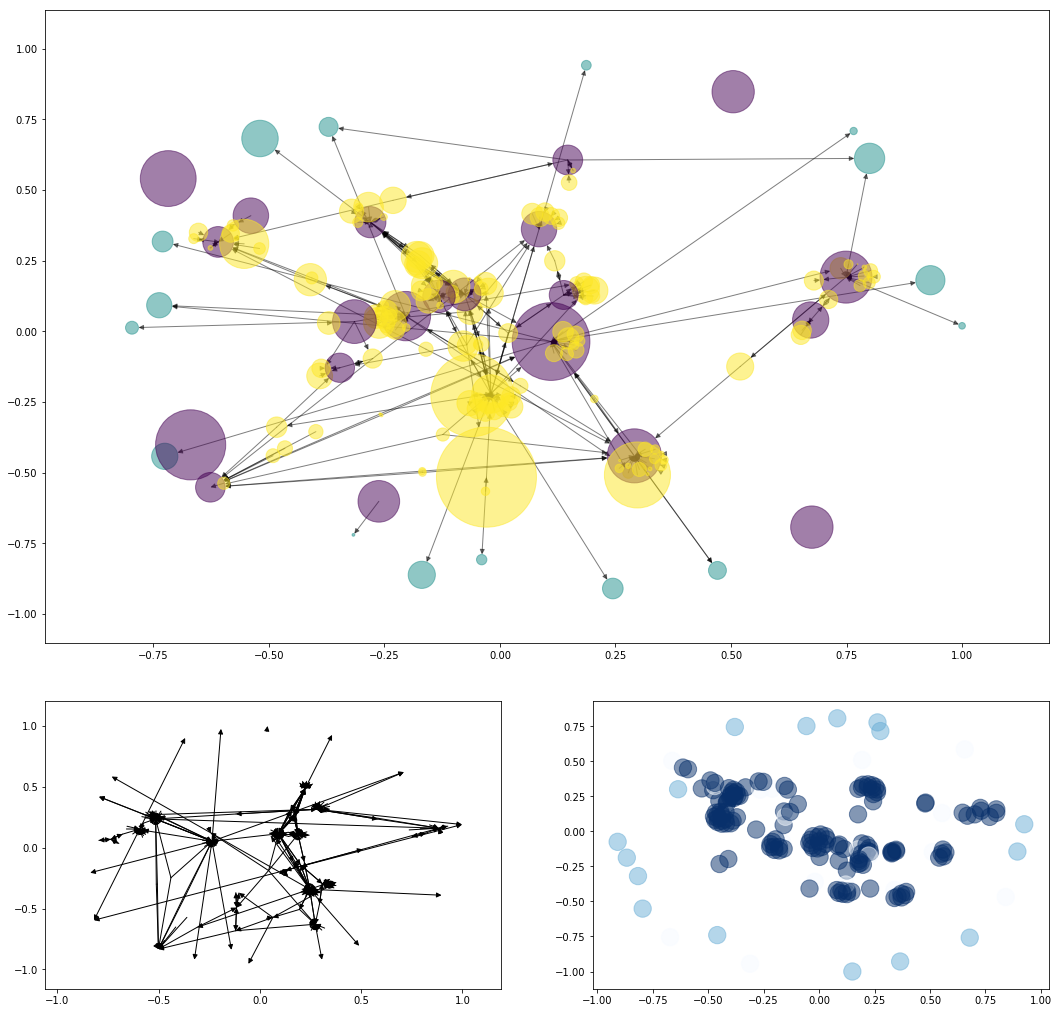

In [325]:
PrintSummaryTwo(G)